In [58]:
import Simulation.pys.fast_sim.EBV_Rv_mask_acc as ER_map
from importlib import reload
import numpy as np
import pickle as pkl
import Simulation.pys.para.model_para as Mp
import Simulation.pys.para.fast_para as qMp
import matplotlib.pyplot as plt
import healpy as hp
import time 

In [59]:
with open('../../data/test_model/test_cosmo_pack.pkl', 'rb') as f:
    cosmo_pack = pkl.load(f)
    
with open('../../data/test_model/test_dust_pack.pkl', 'rb') as f:
    dust_pack = pkl.load(f)
    

In [60]:
Rv_map = dust_pack['Rv_map']
EBV_in_map = dust_pack['EBV_in']
EBV_out_map = Mp.SFD

In [61]:
np.mean(Mp.SFD<0.2)

np.float64(0.7687142690022787)

In [41]:
reload(ER_map)

<module 'Simulation.pys.fast_sim.EBV_Rv_mask_acc' from '/Users/River/PycharmProjects/ExtinctionSim_3pip/Simulation/pys/fast_sim/EBV_Rv_mask_acc.py'>

In [42]:
start = time.time()
masks,label,bins_pack = ER_map.EBV_Rv_submask(EBV_in_map, Rv_map,EBV_out_map,
                                            qMp.EBV_in_bins, qMp.Rv_bins, qMp.EBV_out_bins,
                                            sky_mask = Mp.SFD<0.2, check = True)
end = time.time()
print('EBV_Rv_submask took {} seconds'.format(end-start))

EBV_Rv_submask took 39.82300686836243 seconds


In [43]:
np.shape(masks)

(9000, 3145728)

In [44]:
reload(ER_map)

<module 'Simulation.pys.fast_sim.EBV_Rv_mask_acc' from '/Users/River/PycharmProjects/ExtinctionSim_3pip/Simulation/pys/fast_sim/EBV_Rv_mask_acc.py'>

In [45]:
start = time.time()
usable_index1, lost_rate1 = ER_map.select_mask_of_toplarge_count(masks, 500) 
end = time.time()
print('EBV_Rv_submask took {} seconds'.format(end-start))
print(lost_rate1) 
#glabel object, muct be carefully decided later

EBV_Rv_submask took 18.729541063308716 seconds
0.06365816077142761


In [46]:
start = time.time()
usable_index2, lost_rate2 = ER_map.select_top_until_fraction(masks, 1-lost_rate1) 
end = time.time()
print('EBV_Rv_submask took {} seconds'.format(end-start))
print(len(usable_index2))

EBV_Rv_submask took 19.144176244735718 seconds
500


In [47]:
usable_index2

array([ 401, 1002,  381, 1303,  982,  701,  681, 1283, 1604,  421, 1022,
       1323,  721, 1584,  361,  702,  962,  682, 1624,  661, 1263, 1905,
        722, 1885, 1564,  400, 1925,  380, 1042,  441, 1343,  662,  741,
       2206, 2205, 1644,  420, 2506,  341, 2186, 1865, 2185, 1904, 2226,
        942, 1003,  360, 2486, 2225, 2807,  641, 1884,  983,  742, 2507,
       2526, 1243, 1945, 2787, 1924, 2827, 3108, 2487, 1023, 2527, 2808,
       1544, 2166, 3088, 3128,  642, 2165, 3409, 2466, 1603,  963,  440,
       1864, 2788, 2246, 2828, 3109, 1062, 1363, 2245, 1583,  461, 2546,
       3429, 2767, 3389,  761, 3107, 3710, 1623, 1845, 2467,  340, 1944,
       1664, 3089, 2847, 3129, 3408, 3410, 2547, 1043, 1304, 2806, 3087,
       3730, 3709, 3690, 3127, 3068, 3148, 1284, 3388, 4011, 3428,  321,
       3430, 2768, 3711, 3390, 2786,  762, 1563, 1965, 3729, 3689, 2826,
       2848, 4031, 1324, 4010,  922, 4312,  621, 4012, 3731, 2505, 3991,
       3449,  100, 2146, 4311, 3691, 3369,   80, 40

In [30]:
assert np.array_equal(usable_index2, usable_index1)

In [48]:
EBV_Rv_discrete = ER_map.compile_usable(masks, label, usable_index1)

In [52]:
reload(ER_map)
EBV_in_equ, Rv_equ, EBV_out_equ, mask_total = ER_map.retrived_EBV_Rvmap(EBV_Rv_discrete, qMp.EBV_in_bins, qMp.Rv_bins, qMp.EBV_out_bins)

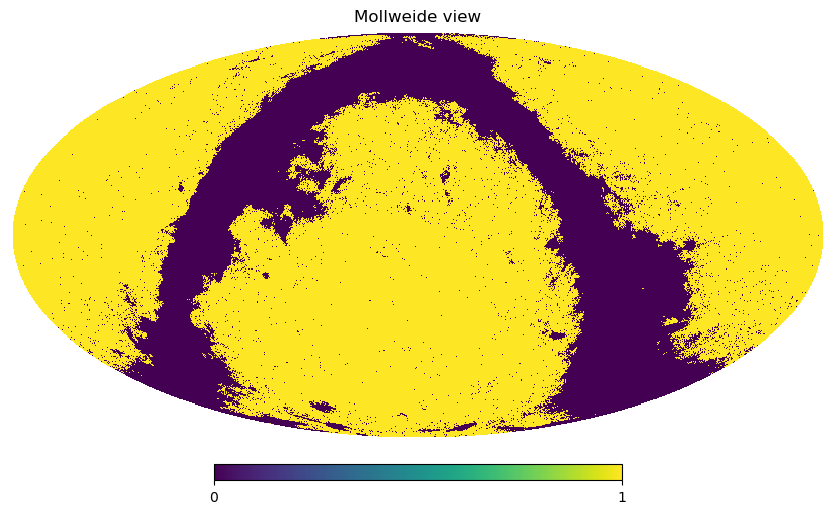

In [53]:
hp.mollview(mask_total)

In [54]:
np.mean(mask_total)

np.float64(0.7197793324788412)

In [55]:
with open('../../data/test_model/discrete_EBVRvmap.pkl', 'wb') as f:
    mapp = {"EBV_in_equ": EBV_in_equ,"Rv_equ": Rv_equ,"EBV_out_equ": EBV_out_equ,"mask": mask_total}
    pkl.dump(mapp, f)

In [56]:
list(EBV_Rv_discrete.keys())[0]

(np.int64(1), np.int64(5), np.int64(1))

In [57]:
with open('../../data/test_model/test_EBV_Rv_mask_list.pkl', 'wb') as f:
    pkl.dump(EBV_Rv_discrete, f)

In [15]:
# with open('../quick_py/quick_Model_data/test_usable_label.pkl', 'wb') as f:
#     pkl.dump({"label": list(EBV_Rv_discrete.keys()), "index":useable_index}, f)